In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
#Reading the data using pandas.

In [4]:
data = pd.read_csv(r'googleplaystore.csv')

In [5]:
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [6]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
## We can see Rating is having number of missing values.
## Current and Android Ver is also having few missing values.

In [8]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<AxesSubplot:>

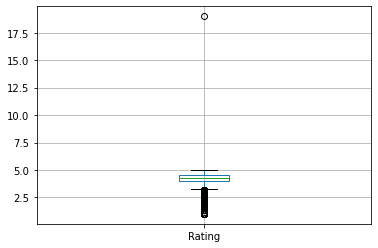

In [9]:
data.boxplot()

In [10]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
##From boxplot we can see a rating value of above 5 is there 
##in the data,which is our outlire. So have to be removed.

In [12]:
data[data['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
data.drop([10472], inplace = True)

<AxesSubplot:>

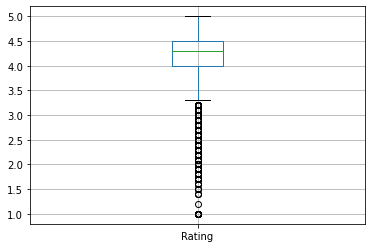

In [14]:
data.boxplot()

In [15]:
##Now we have to fill the null values with either of mean, median, and mode, whichever will be suitable.

In [16]:
data['Rating'].fillna(value = data['Rating'].median(), inplace = True)

In [17]:
data['Type'].mode(), data['Current Ver'].mode(), data['Android Ver'].mode()

(0    Free
 dtype: object,
 0    Varies with device
 dtype: object,
 0    4.1 and up
 dtype: object)

In [18]:
data['Type'].fillna(value = data['Type'].mode().values[0], inplace = True)

In [19]:
data['Current Ver'].fillna(value = data['Current Ver'].mode().values[0], inplace = True)
data['Android Ver'].fillna(value = data['Android Ver'].mode().values[0], inplace = True)

In [20]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [21]:
## Now our Installs, Reviews and Price are non-numeric values.
## So we need to convert them to numeric for further usage.

In [22]:
data['Reviews'] = pd.to_numeric(data['Reviews'], errors = 'coerce')
#Removing '$' from the price.
data['Price'] = data['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
data['Price'] = data['Price'].apply(lambda x: float(x))

In [23]:
##Now let's check some unique values of Installs
data['Installs'].unique()
#We can see there's '+' and ',' symbols in the values, which are to be removed.

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [24]:
data['Installs'] = data['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
data['Installs'] = data['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
##And now converting to float.
data['Installs'] = data['Installs'].apply(lambda x: float(x))

In [25]:
data.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [26]:
#We saw there are catergories in the data,
##so we will group the dataset by categories.

data_by_category = data.groupby('Category')
avg_rating_by_cat = data_by_category['Rating'].agg(np.mean)
avg_price_by_cat = data_by_category['Price'].agg(np.mean)
avg_review_by_cat = data_by_category['Reviews'].agg(np.mean)

In [27]:
avg_rating_by_cat

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

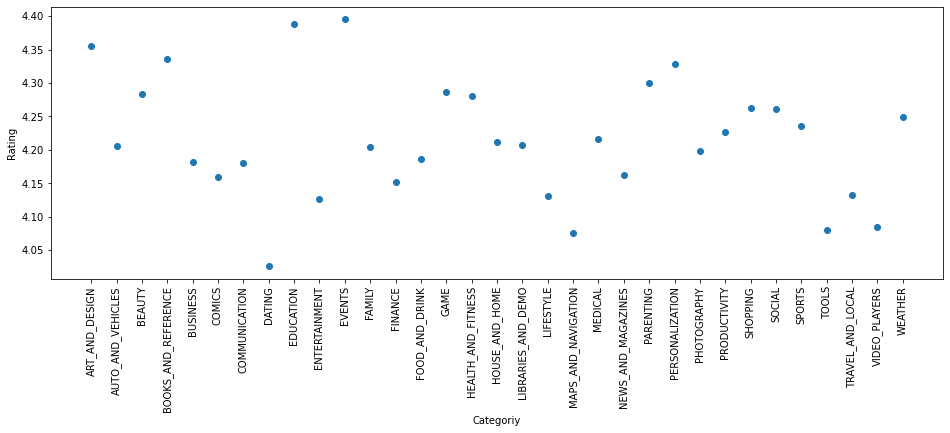

In [28]:
plt.figure(figsize = (16,5))
plt.scatter(avg_rating_by_cat.index, avg_rating_by_cat)
plt.xticks(rotation = 90)
plt.xlabel('Categoriy')
plt.ylabel('Rating')
plt.show()

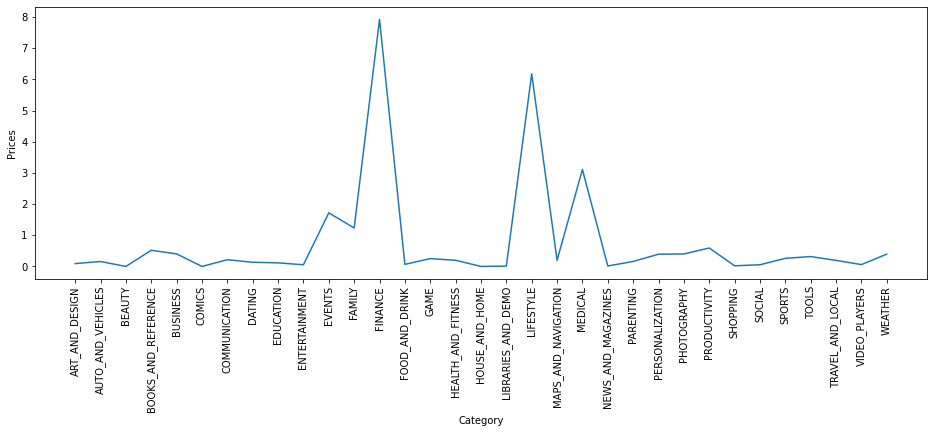

In [29]:
plt.figure(figsize = (16, 5))
plt.plot(avg_price_by_cat.index, avg_price_by_cat)
plt.xticks(rotation = 90)
plt.xlabel('Category')
plt.ylabel('Prices')
plt.show()

In [30]:
##In the graph above, we can see higher prices are for the apps belogning to Finance, Lifestyle and Medical categories.

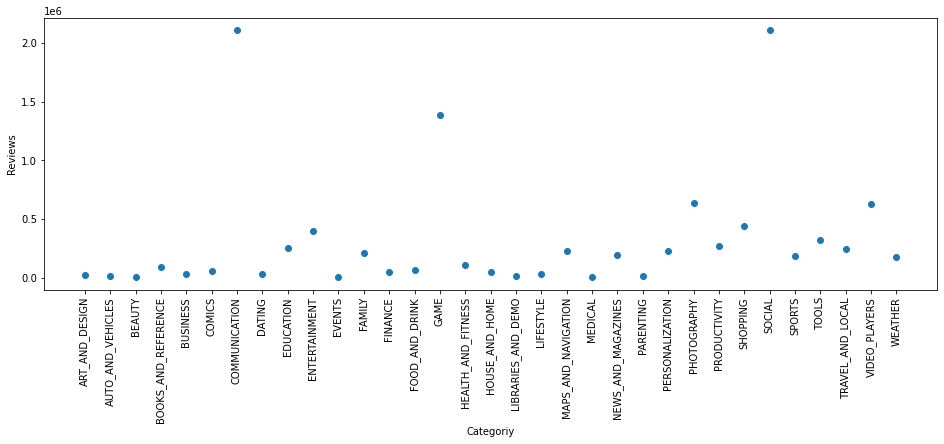

In [31]:
plt.figure(figsize = (16, 5))
plt.scatter(avg_review_by_cat.index, avg_review_by_cat)
plt.xticks(rotation = 90)
plt.xlabel('Categoriy')
plt.ylabel('Reviews')
plt.show()

In [32]:
## This graph depicts most of the review are given for the apps belonging to Communication Game and Social categories.